In [1]:
import os
import PIL.Image as Image
import torch.cuda
import torchvision.transforms as transforms
import numpy as np

from LookGenerator.datasets.utils import prepare_images_for_encoder, to_array_from_decoder, load_image, convert_channel, show_array_as_image, save_array_as_image
from LookGenerator.networks.encoder_decoder import EncoderDecoder
from LookGenerator.networks.utils import load_model

# Загрузка изображений

In [2]:
root = r"C:\Users\Даша\кто\мусор\zalando-hd-resized\val"
file_name = r"00013_00"

human_image = load_image(root, r"imageWithNoCloth", file_name, ".png")
clothes = load_image(root, r"cloth", file_name, r".jpg")

pose_points = []
points_list = os.listdir(os.path.join(
    root,
    r"posePoints",
    file_name
))
print(len(points_list))
for pose_point in points_list:
    pose_point_image = convert_channel(load_image(root, os.path.join(r"posePoints", file_name), pose_point, ""))
    pose_points.append(pose_point_image)

# if model dataset has pose_points=False param:
pose_points = []

17


# Определение трансформаций

In [3]:
input_rgb_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

input_bin_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5],
        std=[0.25]
    )
])

# Загрузка весов модели

In [4]:
model_input = prepare_images_for_encoder(human_image, pose_points, clothes, input_rgb_transform, input_bin_transform).float()

In [5]:
weights_dir = r"C:\Users\Даша\PycharmProjects\SMBackEnd\LookGenerator\weights\epoch_19.pt"

In [6]:
model = EncoderDecoder(in_channels=6, out_channels=3)
model = load_model(model, weights_dir)

In [7]:
device = 'cpu' if torch.cuda.is_available() else 'cpu'

model = model.to(device)
model_input = model_input.to(device)

# Прогон модели

In [8]:
model_output = model(model_input)

# Отображение результата

In [9]:
model_output

tensor([[[[0.8322, 0.8696, 0.8472,  ..., 0.8646, 0.8657, 0.8228],
          [0.8485, 0.8380, 0.8389,  ..., 0.8550, 0.8591, 0.8525],
          [0.8473, 0.8344, 0.8378,  ..., 0.8536, 0.8600, 0.8630],
          ...,
          [0.7447, 0.7270, 0.7362,  ..., 0.8634, 0.8658, 0.8620],
          [0.7418, 0.7339, 0.7410,  ..., 0.8551, 0.8613, 0.8548],
          [0.7442, 0.7230, 0.7027,  ..., 0.8343, 0.8509, 0.7945]],

         [[0.8245, 0.8616, 0.8357,  ..., 0.8563, 0.8557, 0.8111],
          [0.8414, 0.8410, 0.8393,  ..., 0.8549, 0.8563, 0.8449],
          [0.8425, 0.8371, 0.8388,  ..., 0.8534, 0.8575, 0.8544],
          ...,
          [0.7354, 0.7356, 0.7420,  ..., 0.8614, 0.8645, 0.8576],
          [0.7265, 0.7319, 0.7390,  ..., 0.8575, 0.8640, 0.8505],
          [0.7436, 0.7164, 0.7008,  ..., 0.8340, 0.8546, 0.7990]],

         [[0.8257, 0.8626, 0.8321,  ..., 0.8586, 0.8537, 0.8044],
          [0.8430, 0.8373, 0.8370,  ..., 0.8540, 0.8477, 0.8467],
          [0.8480, 0.8363, 0.8394,  ..., 0

In [10]:
model_output = to_array_from_decoder(model_output)

In [12]:
to_plt = model_output

In [13]:
c = np.array(to_plt[:,:,0])
to_plt[:,:,0] = to_plt[:,:,2]
to_plt[:,:,2] = c

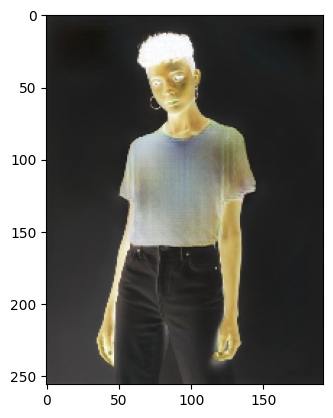

In [14]:
show_array_as_image(np.invert(np.uint8(255*to_plt)))
save_array_as_image(np.uint8(255*model_output), save_path=r"a.png")
